# Mapping change over time

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week11/images/pop%20change.png" width=800>

We have thus far learned how to download Japan's census data using their mesh division system, prepared the data for mapping, and created beautiful maps based on given population characteristics such as population by age and gender groups, and various household types.

In this lab, we will take this same data, but download additional data from a different time period, and compare population statistics over time. In doing so, we will learn how to create side-by-side maps, and also, how to layer multiple variables on the same map.

これまで、メッシュ分割システムを使用して日本の国勢調査データをダウンロードし、地図作成用のデータを準備し、年齢別、性別別の人口、さまざまな世帯タイプなどの所定の人口特性に基づいて美しい地図を作成する方法を学びました。

このラボでは、これと同じデータを取得するが、別の期間から追加のデータをダウンロードし、人口統計を経時的に比較します。 そうすることで、並列マップを作成する方法と、同じマップ上に複数の変数を重ねる方法を学びます。

## Libraries

In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')


## 先週の千葉データを今週のフォルダーにコピー

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week11/images/week%2010%20data%20copy.png" width=400>

Copy the 8 data files from last week's lab (week10/data) to this week's data folder (week11/data). 

先週のラボ (week10/data) から今週のデータ フォルダー (week11/data) に 8 つのデータ ファイルをコピーします。 これら 8 つのファイルは次のようになります。

- SDDSWS5239.zip
- SDDSWS5240.zip
- SDDSWS5339.zip
- SDDSWS5340.zip
- tblT001100S5239.zip
- tblT001100S5240.zip
- tblT001100S5339.zip
- tblT001100S5340.zip

If you do not have access to these files, you can download them from the class website.

これらのファイルにアクセスできない場合は、クラスの Web サイトからダウンロードできます。

## 2015年のデータをダウンロード・インポート

Download additional data for 2015. Once again, we get the data from the eStat website at the 1km mesh scale. 

2015 年の追加データをダウンロードします。ここでも、eStat Web サイトから 1km メッシュ スケールでデータを取得します。

次の手順を実行します：

➡️ https://www.e-stat.go.jp/

➡️ 地図

➡️ 統計データダウンロード

➡️ 統計データ

➡️ 国勢調査

➡️ **2015年**

➡️ 3次メッシュ（1kmメッシュ）

➡️ **その１　人口等基本集計に関する事項**

➡️ メッシュコードで絞込み（左欄）

➡️ M5239, M5240, M5339, M5340 をそれぞれチェックして選択ボタン

➡️ 定義書（PDF)をダウンロード（大事）

➡️ それぞれのCSVファイルをダウンロード

➡️ ダウンロードしたファイル **[tblT000846S5239.zip, tblT000846S5240.zip, tblT000846S5339.zip, tblT000846S5340.zip]** を data フォルダーに移動

前回は、ファイルを展開しなければいけないと思ったのですが、pandas は圧縮ファイルを読み込めることが判明したので、展開する必要はありません。

### メッシュをインポート、統合

In [2]:
# 空間データなので geopandas (gpd) でインポート

chibamesh1 = gpd.read_file('data/SDDSWS5239.zip')
chibamesh2 = gpd.read_file('data/SDDSWS5240.zip')
chibamesh3 = gpd.read_file('data/SDDSWS5339.zip')
chibamesh4 = gpd.read_file('data/SDDSWS5340.zip')

In [3]:
# combine all four mesh shapes
chibamesh = gpd.pd.concat([chibamesh1,chibamesh2,chibamesh3,chibamesh4])

<Axes: >

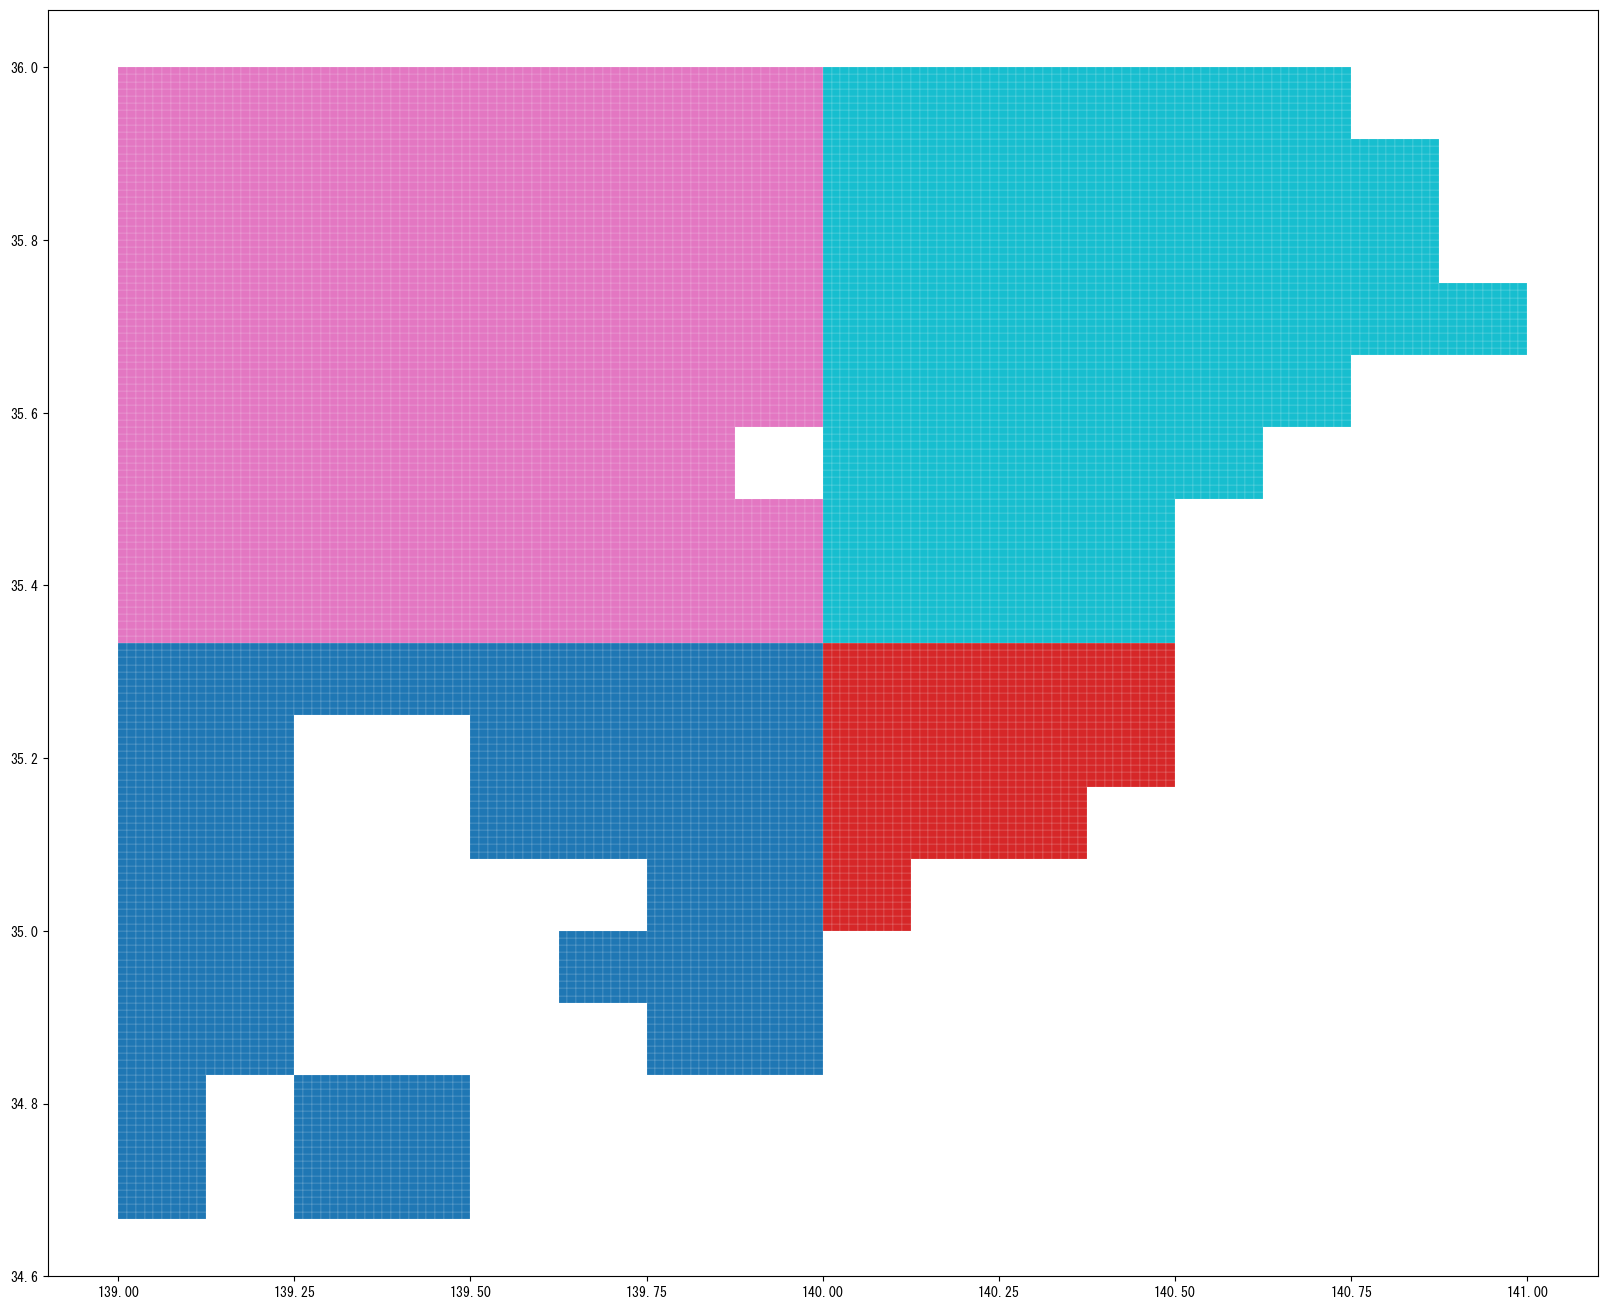

In [4]:
# quick plot
chibamesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.1,column='MESH1_ID')

In [5]:
# csvデータなので pandas (pd) でインポート
# 文字化け予防のために encoding='cp932' 
chibadata1 = pd.read_csv('data/tblT001100S5239.zip', encoding='cp932')
chibadata2 = pd.read_csv('data/tblT001100S5240.zip', encoding='cp932')
chibadata3 = pd.read_csv('data/tblT001100S5339.zip', encoding='cp932')
chibadata4 = pd.read_csv('data/tblT001100S5340.zip', encoding='cp932')
chibadata5 = pd.read_csv('data/tblT000846S5239.zip', encoding='cp932')
chibadata6 = pd.read_csv('data/tblT000846S5240.zip', encoding='cp932')
chibadata7 = pd.read_csv('data/tblT000846S5339.zip', encoding='cp932')
chibadata8 = pd.read_csv('data/tblT000846S5340.zip', encoding='cp932')

### 定義書を確認

## 2020年

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week10/images/metadata.png">

## 2015年

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week11/images/2015%20metadata.png">


## Data cleanup

In [6]:
# check data
chibadata5.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T000846001,T000846002,T000846003,T000846004,T000846005,T000846006,...,T000846032,T000846033,T000846034,T000846035,T000846036,T000846037,T000846038,T000846039,T000846040,T000846041
0,NaN,NaN,NaN,NaN,人口総数,人口総数 男,人口総数 女,０～１４歳人口総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯の一般世帯数,７人以上世帯の一般世帯数,親族のみの一般世帯数,核家族の一般世帯数,核家族以外の一般世帯数,６歳未満世帯員のいる一般世帯数,６５歳以上世帯員のいる一般世帯数,世帯主の年齢が２０～２９歳の１人世帯の一般世帯数,高齢単身の一般世帯数,高齢夫婦のみの一般世帯数
1,52390090.0,2.0,52391000.0,NaN,5,3,2,*,*,*,...,*,*,*,*,*,*,*,*,*,*
2,52390248.0,2.0,52390258.0,NaN,2,1,1,*,*,*,...,*,*,*,*,*,*,*,*,*,*
3,52390249.0,0.0,NaN,NaN,12,7,5,1,1,0,...,0,0,3,3,0,0,2,0,1,0
4,52390258.0,1.0,NaN,52390248,19,9,10,2,1,1,...,0,0,4,3,1,0,2,5,0,1


このデータには 2 つの問題があります。

まず、最初の行には説明テキストが含まれている（人口（総数）など）。 これは、列を数値にする必要がある統計マップを作成する場合に問題を引き起こします。

次に、データに「*」が含まれている。 これも数字以外の文字であるため、問題が発生します。

これらに一つ一つ対処していく必要がある。

In [7]:
# 8つのテーブルから１行目を削除
chibadata1 = chibadata1[1:]
chibadata2 = chibadata2[1:]
chibadata3 = chibadata3[1:]
chibadata4 = chibadata4[1:]
chibadata5 = chibadata5[1:]
chibadata6 = chibadata6[1:]
chibadata7 = chibadata7[1:]
chibadata8 = chibadata8[1:]

In [8]:
# ４つのテーブルから「＊」を非数に置き換える
chibadata1 = chibadata1.replace('*',np.nan)
chibadata2 = chibadata2.replace('*',np.nan)
chibadata3 = chibadata3.replace('*',np.nan)
chibadata4 = chibadata4.replace('*',np.nan)
chibadata5 = chibadata5.replace('*',np.nan)
chibadata6 = chibadata6.replace('*',np.nan)
chibadata7 = chibadata7.replace('*',np.nan)
chibadata8 = chibadata8.replace('*',np.nan)

## 2015年と2020年のデータを統合

クリーンアップされた8つの統計データを一つに統合しよう。これはCSVデータなので pandas の `pd.concat()` 関数を使う。

In [9]:
chibadata2020 = pd.concat([chibadata1,chibadata2,chibadata3,chibadata4])

In [10]:
chibadata2015 = pd.concat([chibadata5,chibadata6,chibadata7,chibadata8])

In [11]:
chibadata2015.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T000846001,T000846002,T000846003,T000846004,T000846005,T000846006,...,T000846032,T000846033,T000846034,T000846035,T000846036,T000846037,T000846038,T000846039,T000846040,T000846041
1,52390090.0,2.0,52391000.0,NaN,5,3,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52390248.0,2.0,52390258.0,NaN,2,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52390249.0,0.0,NaN,NaN,12,7,5,1,1,0,...,0,0,3,3,0,0,2,0,1,0
4,52390258.0,1.0,NaN,52390248,19,9,10,2,1,1,...,0,0,4,3,1,0,2,5,0,1
5,52390259.0,0.0,NaN,NaN,12,6,6,1,1,0,...,0,0,4,4,0,1,4,0,2,1


Although we did not do this in the previous lab, it is recommended to delete unnecessary columns, especially when combining data from different time periods.

前のラボではこれを実行しませんでしたが、特に異なる期間のデータを結合する場合は、不要な列を削除することをお勧めします。

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week11/images/delete.png" width=500>

### 問題：'HTKSYORI', 'HTKSAKI', 'GASSAN'を chibadata2015 and chibadata2020 から削除

In [12]:
# get rid of HTKSYORI, HTKSAKI, GASSAN
columns= ['HTKSYORI','HTKSAKI','GASSAN']
chibadata2015= chibadata2015.drop(columns= columns)

In [13]:
# combine 2015 and 2020 data
chibadata2020= chibadata2020.drop(columns=columns)

In [14]:
chibadata= pd.merge(chibadata2020,chibadata2015,on= 'KEY_CODE')

In [15]:
chibadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10301 entries, 0 to 10300
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    10301 non-null  float64
 1   T001100001  10301 non-null  object 
 2   T001100002  10301 non-null  object 
 3   T001100003  10301 non-null  object 
 4   T001100004  9878 non-null   object 
 5   T001100005  9878 non-null   object 
 6   T001100006  9878 non-null   object 
 7   T001100007  9878 non-null   object 
 8   T001100008  9878 non-null   object 
 9   T001100009  9878 non-null   object 
 10  T001100010  9878 non-null   object 
 11  T001100011  9878 non-null   object 
 12  T001100012  9878 non-null   object 
 13  T001100013  9878 non-null   object 
 14  T001100014  9878 non-null   object 
 15  T001100015  9878 non-null   object 
 16  T001100016  9878 non-null   object 
 17  T001100017  9878 non-null   object 
 18  T001100018  9878 non-null   object 
 19  T001100019  9878 non-null

### データタイプ管理

データがobjectだと数値ではないのでマップもチャートも作れません。

このデータはカラムの数が多いので、ひとつひとつ変えて行くのは要領が悪いので、すべてのデータ型を一括で変更する方法を説明します。

In [16]:
# まずはカラムをアウトプット
chibadata.columns

Index(['KEY_CODE', 'T001100001', 'T001100002', 'T001100003', 'T001100004',
       'T001100005', 'T001100006', 'T001100007', 'T001100008', 'T001100009',
       'T001100010', 'T001100011', 'T001100012', 'T001100013', 'T001100014',
       'T001100015', 'T001100016', 'T001100017', 'T001100018', 'T001100019',
       'T001100020', 'T001100021', 'T001100022', 'T001100023', 'T001100024',
       'T001100025', 'T001100026', 'T001100027', 'T001100028', 'T001100029',
       'T001100030', 'T001100031', 'T001100032', 'T001100033', 'T001100034',
       'T001100035', 'T001100036', 'T001100037', 'T001100038', 'T001100039',
       'T001100040', 'T001100041', 'T001100042', 'T001100043', 'T001100044',
       'T001100045', 'T001100046', 'T001100047', 'T001100048', 'T001100049',
       'T001100050', 'T000846001', 'T000846002', 'T000846003', 'T000846004',
       'T000846005', 'T000846006', 'T000846007', 'T000846008', 'T000846009',
       'T000846010', 'T000846011', 'T000846012', 'T000846013', 'T000846014',
 

変換が必要なのは「T00...」で始まる変数のみなので、このリストの1番目以降になる。

では1番目以降のカラムをアウトプットしよう。

In [17]:
# 1番目以降をアウトプット
chibadata.columns[1:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050',
       'T000846001', 'T000846002', 'T000846003', 'T000846004', 'T000846005',
       'T000846006', 'T000846007', 'T000846008', 'T000846009', 'T000846010',
       'T000846011', 'T000846012', 'T000846013', 'T000846014', 'T000846015',

カラム1個目からの変数を全て「float」に変更。

In [ ]:
# 元のデータを入れ替える
chibadata[chibadata.columns[1:]]=chibadata[chibadata.columns[1:]].astype(float)

さ、必ずうまく行ったかどうかをチェックする。objectがfloatに変わってたら成功！

In [19]:
# check!
chibadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10301 entries, 0 to 10300
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    10301 non-null  float64
 1   T001100001  10301 non-null  float64
 2   T001100002  10301 non-null  float64
 3   T001100003  10301 non-null  float64
 4   T001100004  9878 non-null   float64
 5   T001100005  9878 non-null   float64
 6   T001100006  9878 non-null   float64
 7   T001100007  9878 non-null   float64
 8   T001100008  9878 non-null   float64
 9   T001100009  9878 non-null   float64
 10  T001100010  9878 non-null   float64
 11  T001100011  9878 non-null   float64
 12  T001100012  9878 non-null   float64
 13  T001100013  9878 non-null   float64
 14  T001100014  9878 non-null   float64
 15  T001100015  9878 non-null   float64
 16  T001100016  9878 non-null   float64
 17  T001100017  9878 non-null   float64
 18  T001100018  9878 non-null   float64
 19  T001100019  9878 non-null

## Join Mesh with Data

ついに、結合されたメッシュ データ (chibamesh) と結合されたデータフレーム (chibadata) が完成しました。 最後のステップは、chibadata を chibamesh geodataframe に結合することです。

これを行うには、それらを KEY_CODE id 列で結合します。 ただし、chibamesh KEY_CODE 列はオブジェクトであることに注意してください。 まずこれを float に変換しましょう。

In [20]:
# KEY_CODEをfloatに
chibamesh['KEY_CODE']=chibamesh['KEY_CODE'].astype(float)

マージを実行する！

In [21]:
# merge the data
chibamesh = chibamesh.merge(chibadata, on='KEY_CODE')

In [22]:
# check!
chibamesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,T001100001,T001100002,T001100003,T001100004,...,T000846032,T000846033,T000846034,T000846035,T000846036,T000846037,T000846038,T000846039,T000846040,T000846041
405,52394619.0,5239,46,19,1720,"POLYGON ((139.87500 35.00833, 139.86250 35.008...",1319.0,613.0,706.0,119.0,...,12.0,2.0,340.0,278.0,62.0,51.0,246.0,6.0,57.0,88.0
9833,53407038.0,5340,70,38,4139,"POLYGON ((140.11250 35.94167, 140.10000 35.941...",15.0,9.0,6.0,0.0,...,0.0,0.0,5.0,3.0,2.0,0.0,4.0,0.0,0.0,0.0
3481,53393134.0,5339,31,34,2435,"POLYGON ((139.18750 35.60833, 139.17500 35.608...",133.0,61.0,72.0,10.0,...,0.0,0.0,61.0,53.0,8.0,6.0,48.0,0.0,11.0,14.0
5158,53395615.0,5339,56,15,4516,"POLYGON ((139.82500 35.75833, 139.81250 35.758...",20722.0,11363.0,9359.0,1876.0,...,45.0,12.0,4320.0,3972.0,348.0,708.0,2305.0,1166.0,873.0,517.0
973,52397048.0,5239,70,48,3149,"POLYGON ((139.11250 35.28333, 139.10000 35.283...",225.0,113.0,112.0,16.0,...,5.0,2.0,73.0,52.0,21.0,5.0,57.0,0.0,8.0,17.0


## Map time


### Project the data
マッピング プロセスを開始する前に、データを Web メルカトルに再投影する必要があることに注意してください。Web メルカトルの crs コードは 3867 です。これは、データを contextily ライブラリで利用できるベースマップと互換性を持たせるために必要です。

In [23]:
# reproject to 3857 (web mercator)
chibamesh = chibamesh.to_crs(3857)

<Axes: >

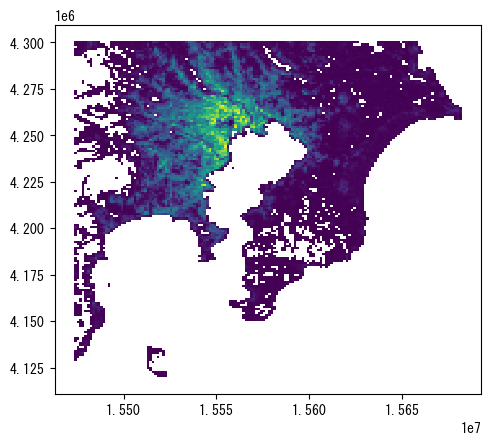

In [24]:
# make a quick plot
chibamesh.plot(column='T001100001')

ここまでは前回と一緒。では新しいデータ（2015年）はマップできるかな？

<Axes: >

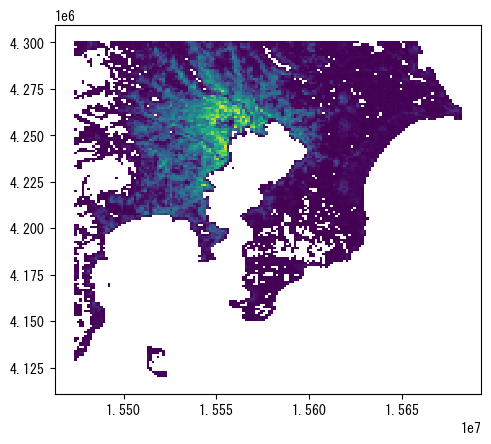

In [25]:
# make a quick plot
chibamesh.plot(column='T000846001')

綺麗なマップを作成。

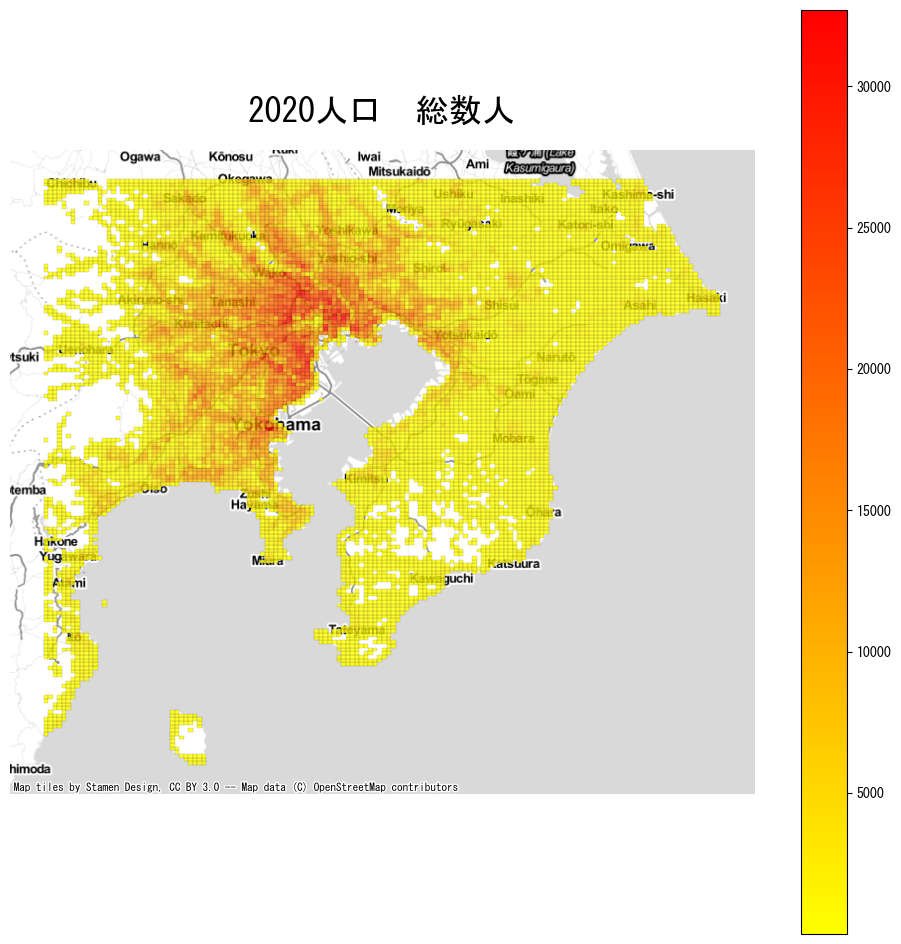

In [26]:
# 2020 population map
ax = chibamesh.plot(figsize=(12,12),
         column='T001100001',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2020人口　総数人',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

### Map fixes

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week11/images/map%20fixes.png" width=600>

The beauty of python is that you can do almost do anything you wish... within reason. Let's make this map even better by fixing three parts.

- Changing the legend size can be accomplished with the `legend_kwds` option and setting a value for the `shrink` argument.
- You can change the range of the legend scale using the `vmax` and `vmin` options. Set the range to go from 0 to 15000.
- The map has extra space around the meshes. We can get rid of this space by zooming to the extent of the data by getting the `total_bounds` of the meshes, and setting the extent of the map with `set_xlim` and `set_ylim`.

Python の利点は、理にかなった範囲内で、やりたいことはほぼすべて実行できること。 では、3 つの部分を修正して、このマップをさらに改善しましょう。

- 凡例のサイズを変更するには、`legend_kwds` オプションを使用し、`shrink` 引数の値を設定する
- `vmax` および `vmin` オプションを使用して、凡例のスケールの範囲を変更する。範囲を 0 ～ 15000 に設定するように。
- マップにはメッシュの周囲に余分なスペースがあります。 メッシュの「total_bounds」を取得してデータの範囲にズームし、「set_xlim」と「set_ylim」でマップの範囲を設定することで、このスペースを取り除くことができる。

### 問題

次のセルに、要求された変更を加えて新しいマップを作成します。 お気軽にGoogleやChatGPTにご相談ください。

In [27]:
# 2020 population map
ax = chibamesh.plot(figsize=(12,12),
         column='T001100001',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8
         legend_kwds={'shrink':0.5}
         vmin= 0
         vmax= 15000
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2020人口　総数人',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

bounds = chibamesh.total_bounds
ax.set_xlim(bounds[0],bounds[2])
ax.set_ylim(bounds[1],bounds[3])


# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3230972242.py, line 8)

# Creating side-by-side maps

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week11/images/subplots.png" width=600>

When comparing one map's data to another, it is recommended to generate side-by-side maps. In Geopandas, the `subplots` function is used to create multiple subplots within a single figure. The subplots function is a convenient way to create a grid of subplots, allowing you to plot multiple GeoDataFrames or different views of the same GeoDataFrame side by side.

あるマップのデータを別のマップのデータと比較する場合は、並列マップを生成することをお勧めします。Geopandas では、`subplots` 関数を使用して、単一の Figure 内に複数のサブプロットを作成します。 subplots 関数は、サブプロットのグリッドを作成する便利な方法で、複数の GeoDataFrame または同じ GeoDataFrame の異なるビューを並べてプロットできます。

**Create the subplots for side-by-side maps**

```python
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20))
```

**Create a plot for the left-hand map (`ax[0]`)**

```python
chibamesh.plot(ax = ax[0], # 左のマップ
    column='T000846001',
    ...,
    ...,
)
```

**Create a plot for the right-hand map (`ax[1]`)**

```python
chibamesh.plot(ax = ax[0], # 左のマップ
    column='T001100001',
    ...,
    ...,
)
```

In [ ]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
chibamesh.plot(ax = ax[0], # 左のマップ
    column='T000846001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=15000)

# 2020 population
chibamesh.plot(ax = ax[1], # 右のマップ
    column='T001100001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=15000)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# title
ax[0].set_title('2015 人口総数',fontsize=24); # 左
ax[1].set_title('2020 人口総数',fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = chibamesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # 左
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # 右

# Create a new field for population change
These are beautiful side by side maps. However, one can hardly tell the difference between them! One way to show the difference between data from different time periods is to calculate the difference between them. To do so:

- create a new field `pop_change_2015_2020`
- calculate the population change (difference) between 2015 and 2020
- map the new field

横並びの美しい地図ができたね。 でも、違いを区別することはほとんどできない。 異なる期間のデータ間の差異を示す 1 つの方法は、データ間の差異を計算することです。 そうするために：

- 新しいフィールド「pop_change_2015_2020」を作成する
- 2015年と2020年の人口変化（差）を計算する
- 新しいフィールドをマップする

In [ ]:
# create a new field
chibamesh['pop_change_2015_2020'] = np.nan

### 問題

さ、ここでまた問題！下のセルで、2020 年と 2015 年の総人口の差を計算し、その値を Pop_change_2015_2020 フィールドに入力してみましょう。

In [ ]:
# calculate population change



In [ ]:
# check!
chibamesh[['KEY_CODE','T001100001','T000846001','pop_change_2015_2020']].sample(5)

In [ ]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12)) # 一つのマップなのでnrows,ncols=1

# 2015-2020 population change
chibamesh.plot(ax = ax,
        column='pop_change_2015_2020',
        legend=True,
        legend_kwds={'shrink': 0.5},
        cmap='autumn_r',
        edgecolor='black',
        linewidth=0.1,
        alpha=0.8,)

# hide axes
ax.axis('off')

# title
ax.set_title('2015 年から 2020 年までの人口の変化',fontsize=24, pad=20);

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = chibamesh.total_bounds

# Set the plot limits based on the total bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week11/images/diverging.png" width=500>

This map is not very legible. How can we make it better? With maps that show positive and negative values, we use a divergent color scheme. Furthermore, in order to set the neutral color at the middle, we make sure to make the vmin and vmax values equal.

この地図はあまり読みにくいです。 どうすれば改善できるでしょうか? 正の値と負の値を示すマップでは、発散カラー スキームを使用します。 さらに、中間色を設定するために、vmin と vmax の値が同じになるようにします。

In [ ]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

# 2015-2020 population change
chibamesh.plot(ax = ax,
    column='pop_change_2015_2020',
         legend=True,
         legend_kwds={'shrink': 0.5},
         cmap='seismic',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=-3000, # vminとvmaxが同じことによって、中間値がゼロになる
         vmax=3000
         )

# hide axes
ax.axis('off')

# title
ax.set_title('東京・千葉 2015-2020 人口の変化',fontsize=30, pad=20)

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = chibamesh.total_bounds

# Set the plot limits based on the total bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)


## Additional maps

Let's make the following maps:

- The top 20 areas with the highest increase in population.
- The top 20 areas with the highest decrease in population.

次のような地図を作ってみましょう。

- 人口増加率上位 20 地域
- 人口減少率上位 20 地域

In [ ]:
# sort by population change
chibamesh = chibamesh.sort_values(by='pop_change_2015_2020')

In [ ]:
# check!
chibamesh['pop_change_2015_2020']

In [ ]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

# 2015-2020 population change
chibamesh.tail(20).plot(ax = ax,
    column='pop_change_2015_2020',
         legend=True,
         legend_kwds={'shrink': 0.5},
         cmap='seismic',
         edgecolor='black',
         linewidth=1,
         alpha=0.8,
         vmin=-3000,
         vmax=3000)

# hide axes
ax.axis('off')

# title
ax.set_title('人口増加率上位 20 地域',fontsize=24, pad=20)

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)


Finally, we can put *both* maps on a single map, by overlying the on top of one another.

In [ ]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

# 2015-2020 population change
chibamesh.head(20).plot(ax = ax,
    column='pop_change_2015_2020',
         legend=True,legend_kwds={'shrink': 0.5},
         cmap='seismic',
         edgecolor='black',
         linewidth=1,
         alpha=0.8,
         vmin=-3000,
         vmax=3000)

# hide axes
ax.axis('off')

# title
ax.set_title('人口減少率上位 20 地域',fontsize=24, pad=20)

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)


In [ ]:
# population map
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,12))

# 2015-2020 population change
chibamesh.head(20).plot(ax = ax,
        column='pop_change_2015_2020',
        legend=True,legend_kwds={'shrink': 0.5},
        cmap='seismic',
        edgecolor='black',
        linewidth=1,
        alpha=0.8,
        vmin=-3000,
        vmax=3000)

# 2015-2020 population change
chibamesh.tail(20).plot(ax = ax,
        column='pop_change_2015_2020',
        cmap='seismic',
        edgecolor='black',
        linewidth=1,
        alpha=0.8,
        vmin=-3000,
        vmax=3000)

# hide axes
ax.axis('off')

# title
ax.set_title('人口増加と減少の上位 20 地域',fontsize=24, pad=20)

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)
